<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/bozzato/Lab-6/bozzato_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Partial differential equation**
**Bozzato Federico**

# **Abstract**

Short summary of the lab report. State the objectives, methods used, main results and conlusions. 

#**About the code**

**Author:** Federico Bozzato

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
from numpy import linalg as la
from matplotlib import pyplot as plt


# **Introduction**

Give a short description of the problem investigated in the report, and provide some background information so that the reader can understand the context. 

Briefly describe what method you have chosen to solve the problem, and justify why you selected that method. 

Here you can express mathematics through Latex syntax, and use hyperlinks for references.

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/7500)

$
{\displaystyle \frac{\partial u}{\partial t}} + u\cdot \nabla u +\nabla p = f, \quad \nabla \cdot u=0$



#Methods

##Mandatory assignment

###1. Function: FEM for 1D boundary value problem $-u''(x) = f(x)$ with $u(0)=u(1)=0$

In [0]:
def bvp1d(fun, mesh, ua, ub):
  if not isinstance(mesh, np.ndarray):
    mesh= np.array(mesh)
    
  n= mesh.shape[0]
  h= mesh[1:] - mesh[:-1]
  inNodes= n-2                             # inNodes= number of inner nodes
  
  S= np.zeros((inNodes,inNodes))
  S[0,0]= 1/h[0]**2
  S[-1,-1]= 1/h[-1]**2
  b= np.zeros((inNodes,1))
  b[0]= ua/(h[0]**2)
  b[-1]= ub/(h[-1]**2)
  
  # stiffness matrix
  for i in range(0,inNodes-1):
    S[i,i]+= 1/h[i]**2
    S[i+1,i]= -1/h[i]**2
    S[i,i+1]= -1/h[i]**2
    S[i+1,i+1]+= 1/h[i]**2
    
  # load factor
  for k in range(1,n-1):
    b[k-1]+= - fun(mesh[k])
    
  _x= la.lstsq(S,b,rcond=None)[0]
  
  # update the solution with the contraints
  x= np.zeros((n,1))
  x[0]= ua
  x[1:n-1]= _x
  x[-1]= ub
    
  return S, b, x

[0.   0.25 0.5  0.75 1.  ]
S=
 [[ 32. -16.   0.]
 [-16.  32. -16.]
 [  0. -16.  32.]]
b=
 [[-0.25 -0.5  15.25]]
x=
 [[0.       ]
 [0.2109375]
 [0.4375   ]
 [0.6953125]
 [1.       ]]


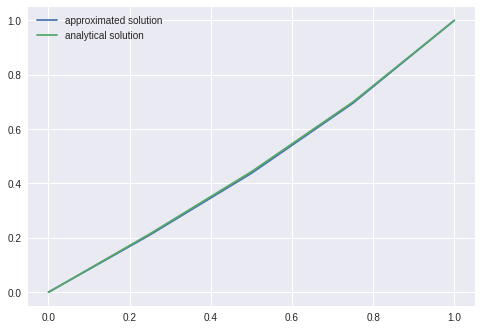

In [4]:
def fun(x):
	e= np.e
	C1= -e/(e**2-1)
	C2= -C1
	return C1*np.e**(-x)+C2*np.e**x

mesh= np.array([x/4 for x in range(0,5)])         # mesh= [ 0, pi/4, pi/2, 3*pi/4, pi ]
print(mesh)

fsec= lambda x : x                                     # bvp: u''= -x          with u(0)=u(pi)=0


S, b, x= bvp1d(fsec, mesh, 0, 1)
print('S=\n',S)
print('b=\n',b.T)
print('x=\n',x)

plt.figure()
plt.plot(mesh,x)
plt.plot(mesh,fun(mesh))
plt.legend(['approximated solution', 'analytical solution'])
plt.show()

##Extra assignment

###2. Function: FEM for 2D Poisson equation -Delta u(x) = f(x), with triangular mesh

# **Results**

Present the results. If the result is an algorithm that you have described under the *Methods* section, you can present the data from verification and performance tests in this section. If the result is the output from a computational experiment this is where you present a selection of that data. 

# **Discussion**

Summarize your results and your conclusions. Were the results expected or surprising. Do your results have implications outside the particular problem investigated in this report? 

# **APPENDIX**

[fast stiffness](https://www.hindawi.com/journals/jam/2014/932314/)